In [4]:
try:
    from ucimlrepo import fetch_ucirepo 
    import pandas as pd
    import numpy as np  
    from numpy.fft import fft
    import random 
    from scipy.stats import mode
    import glob
    import os 
    import matplotlib.pyplot as plt
    from rich import print as rprint
    import sklearn 
    import librosa 
    import json 
    from mpl_toolkits.mplot3d import Axes3D
    from sklearn.preprocessing import MinMaxScaler, StandardScaler
except ImportError:
    import subprocess
    import sys
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'ucimlrepo', 'pandas', 'numpy', 'scipy', 'matplotlib', 'librosa', 'rich', 'sklearn', 'librosa' ])
    # Una vez instaladas las bibliotecas, intenta importarlas nuevamente
    from ucimlrepo import fetch_ucirepo 
    import pandas as pd
    import numpy as np  
    from numpy.fft import fft
    from scipy.stats import mode
    import librosa 
    import json 

#Aumentar visualización de datos ya que notebok limita el numero de columnas a observar 
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

## **Extracciónn de datos**

In [5]:
data_wine_raw = pd.read_csv("./wine_data.csv")
data_wine_raw

,class_label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
data_wine_nc = data_wine_raw.iloc[:,1:]
name_features = data_wine_raw.columns.to_list()[1:]

## **Extracción de caracteristicas**

In [7]:
feature_ejex = 0
feature_ejey = 1
feature_ejez = 2

x_1 = (data_wine_nc.iloc[:59,feature_ejex]).to_list()
y_1 = (data_wine_nc.iloc[:59,feature_ejey]).to_list()
z_1 = (data_wine_nc.iloc[:59,feature_ejez]).to_list()

x_2 = (data_wine_nc.iloc[59:130,feature_ejex]).to_list()
y_2 = (data_wine_nc.iloc[59:130,feature_ejey]).to_list()
z_2 = (data_wine_nc.iloc[59:130,feature_ejez]).to_list()

x_3 = (data_wine_nc.iloc[130:,feature_ejex]).to_list()
y_3 = (data_wine_nc.iloc[130:,feature_ejey]).to_list()
z_3 = (data_wine_nc.iloc[130:,feature_ejez]).to_list()

### **Representación grafica**

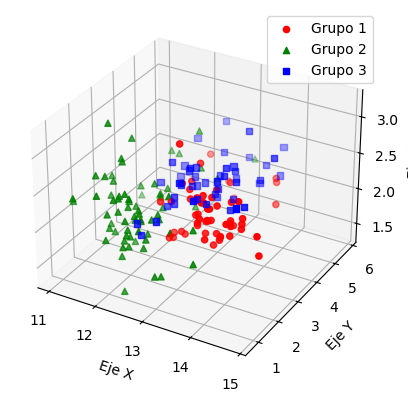

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar puntos para cada grupo con diferentes colores y marcadores
ax.scatter(x_1, y_1, z_1, c='r', marker='o', label='Grupo 1')
ax.scatter(x_2, y_2, z_2, c='g', marker='^', label='Grupo 2')
ax.scatter(x_3, y_3, z_3, c='b', marker='s', label='Grupo 3')

# Etiquetas de los ejes
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')

# Añadir leyenda
ax.legend()

# Mostrar gráfico
plt.show()

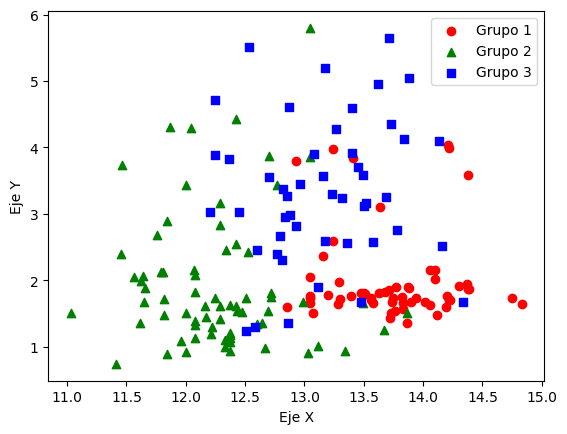

In [9]:
# Crear figura
plt.figure()

# Graficar puntos para cada grupo con diferentes colores y marcadores
plt.scatter(x_1, y_1, c='r', marker='o', label='Grupo 1')
plt.scatter(x_2, y_2, c='g', marker='^', label='Grupo 2')
plt.scatter(x_3, y_3, c='b', marker='s', label='Grupo 3')

# Etiquetas de los ejes
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

# Añadir leyenda
plt.legend()

# Mostrar gráfico
plt.show()

## **Estandarización**

In [10]:
standard_scaler = StandardScaler()
wine_normal = standard_scaler.fit_transform(data_wine_nc)
wine_normal = pd.DataFrame(wine_normal, columns=data_wine_nc.columns)
wine_normal = wine_normal.T

## **Matriz de covarianza**

In [11]:
matrix_cov = np.cov(wine_normal)

### **Calculo de los eigenvalores y eigenvectores**

In [12]:
eigen_val, eigen_vec = np.linalg.eig(matrix_cov)
#Se obtiene las siguientes dimensiones para
#eigen_val -> (13,1)
#eigen_vec -> (13,13)

### **Ordenar de forma descendiente los igenvalores y por tanto sus eigenvectores asociados a tales eigenvalores**

In [13]:
# [::-1] invierte una lista o arreglo 
ind = np.argsort( eigen_val)[::-1]
#eigen_val_ord = eigen_val[ind]
eigen_vec_ord = eigen_vec[:, ind]

### **Seleccionar el numero de eigenvectores**

In [14]:
eigenvectores_visualizar = [0, 1, 3]
matriz_de_transformacion = eigen_vec_ord[:,eigenvectores_visualizar]
#La matriz_de_transformacion tiene las dimensiones de -> (13,3)
matriz_de_transformacion = matriz_de_transformacion.T
#Ahora la matriz_de_transformacion tiene la dimension de -> (3,13)
data_reducido = (matriz_de_transformacion @ wine_normal).T
#Se hace la multiplicación de matrices de las siguientes dimensiones
# (3,13) * (13, 178)

### **Representación grafica**

In [15]:
feature_ejex = 0
feature_ejey = 1
feature_ejez = 2

x_1 = (data_reducido.iloc[:59,feature_ejex]).to_list()
y_1 = (data_reducido.iloc[:59,feature_ejey]).to_list()
z_1 = (data_reducido.iloc[:59,feature_ejez]).to_list()

x_2 = (data_reducido.iloc[59:130,feature_ejex]).to_list()
y_2 = (data_reducido.iloc[59:130,feature_ejey]).to_list()
z_2 = (data_reducido.iloc[59:130,feature_ejez]).to_list()

x_3 = (data_reducido.iloc[130:,feature_ejex]).to_list()
y_3 = (data_reducido.iloc[130:,feature_ejey]).to_list()
z_3 = (data_reducido.iloc[130:,feature_ejez]).to_list()

## **3D**

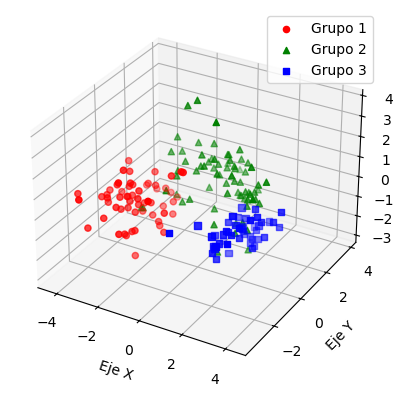

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar puntos para cada grupo con diferentes colores y marcadores
ax.scatter(x_1, y_1, z_1, c='r', marker='o', label='Grupo 1')
ax.scatter(x_2, y_2, z_2, c='g', marker='^', label='Grupo 2')
ax.scatter(x_3, y_3, z_3, c='b', marker='s', label='Grupo 3')

# Etiquetas de los ejes
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')

# Añadir leyenda
ax.legend()

# Mostrar gráfico
plt.show()

## **2D**

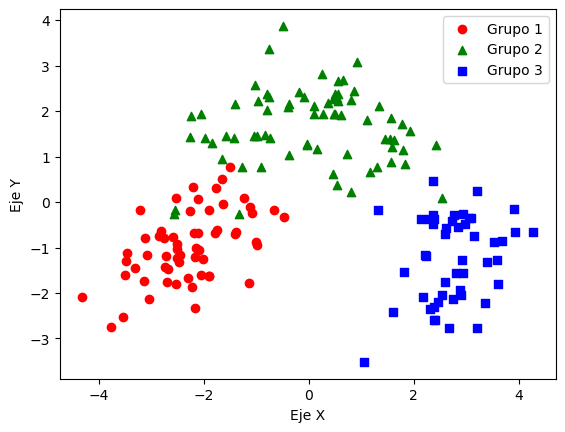

In [17]:
# Crear figura
plt.figure()

# Graficar puntos para cada grupo con diferentes colores y marcadores
plt.scatter(x_1, y_1, c='r', marker='o', label='Grupo 1')
plt.scatter(x_2, y_2, c='g', marker='^', label='Grupo 2')
plt.scatter(x_3, y_3, c='b', marker='s', label='Grupo 3')

# Etiquetas de los ejes
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

# Añadir leyenda
plt.legend()

# Mostrar gráfico
plt.show()